In [120]:
## Covid-19 Visualization
#### by Fery

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [122]:
# load original dataset

df = pd.read_csv("datasets/data.csv") # data from kawalcovid19.id
stats = pd.read_csv("datasets/daily_stats.csv") # data from kawalcovid19.id
stats = stats.loc[:,:'Case Growth Rate'].drop(columns=[
    'Kasus Impor', 'Kasus Lokal', 'PDP', 'ODP', 'Positif \n(=C)', 'Jumlah test/juta penduduk'])
df.head()

,Total Kasus,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,Unnamed: 36
0,18-Mar,0,1,17,0,0,3,158,0,24,...,1,0,0,0,0,0,0,0,0,NaN
1,19-Mar,0,1,27,0,0,5,210,0,26,...,2,0,0,0,0,0,0,0,0,NaN
2,20-Mar,0,4,37,0,0,4,215,0,41,...,1,0,0,0,0,0,0,0,13,NaN
3,21-Mar,0,3,43,0,0,5,267,0,55,...,1,0,0,0,0,0,0,0,10,NaN
4,22-Mar,0,3,47,0,0,5,307,0,59,...,1,0,1,0,2,0,0,0,6,NaN


### Data per daerah

In [123]:
df[df['Aceh'] == 'Aceh'] # shown 7 different tables that will be used

,Total Kasus,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,Unnamed: 36
292,Kasus Harian,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,NaN
588,Kasus Aktif,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,NaN
878,Sembuh,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,NaN
1168,Sembuh Harian,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,NaN
1458,Meninggal Dunia,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,NaN
1751,Meninggal Dunia Harian,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,NaN


In [124]:
diff_table = df[df['Aceh'] == 'Aceh'].index # index of different table
diff_table

Int64Index([292, 588, 878, 1168, 1458, 1751], dtype='int64')

In [125]:
exclude = df[df['Aceh'] == 'Jakarta'].index
exclude[0] # index of table that will be excluded

2040

In [126]:
# seperate the tables
total_kasus = df.iloc[:diff_table[0]-1].reset_index(drop=True)
kasus_harian = df.iloc[diff_table[0]+1:diff_table[1]-1].reset_index(drop=True)
kasus_aktif = df.iloc[diff_table[1]+1:diff_table[2]-1].reset_index(drop=True)
sembuh = df.iloc[diff_table[2]+1:diff_table[3]-1].reset_index(drop=True)
sembuh_harian = df.iloc[diff_table[3]+1:diff_table[4]-1].reset_index(drop=True)
meninggal_dunia = df.iloc[diff_table[4]+1:diff_table[5]-1].reset_index(drop=True)
meninggal_dunia_harian = df.iloc[diff_table[5]+1:exclude[0]-1].reset_index(drop=True)

In [127]:
total_kasus.head(3)

,Total Kasus,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,Unnamed: 36
0,18-Mar,0,1,17,0,0,3,158,0,24,...,1,0,0,0,0,0,0,0,0,NaN
1,19-Mar,0,1,27,0,0,5,210,0,26,...,2,0,0,0,0,0,0,0,0,NaN
2,20-Mar,0,4,37,0,0,4,215,0,41,...,1,0,0,0,0,0,0,0,13,NaN


In [128]:
# list of tables
list_table = [total_kasus, kasus_harian, kasus_aktif, sembuh,
              sembuh_harian, meninggal_dunia, meninggal_dunia_harian]

In [129]:
for table in list_table:
    year2020end_index = table[table['Total Kasus'] == '31 Dec'].index
    year2020 = table.iloc[:year2020end_index[0]+1]
    add2020 = [day + "-2020" for day in year2020['Total Kasus']] # add '-2020' to each date before 1 Jan 2021
    year2021 = table.iloc[year2020end_index[0]+1:]
    add2021 = [day + "-2021" for day in year2021['Total Kasus']] # add '-2021' to each date after 30 Dec 2020
    add2020.extend(add2021)
    table['Total Kasus'] = add2020
    table['Total Kasus'] = [day.replace(" ","-") for day in table['Total Kasus']]
    table.rename(columns={'Total Kasus': 'Date'}, inplace=True)
    table.set_index('Date', inplace=True)

In [130]:
total_kasus.tail(3)

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,Unnamed: 36
Date,,,,,,,,,,,,,,,,,,,,,
31-Dec-2020,"8,746","17,593","18,170","2,337","3,603","12,155","183,735","3,227","83,579","81,716",...,"24,966","2,771","5,722","5,979","13,216","1,941","2,167","3,841",0,NaN
1-Jan-2021,"8,753","17,694","18,457","2,417","3,671","12,388","185,691","3,263","85,083","82,613",...,"25,113","2,773","5,754","5,995","13,227","1,954","2,181","3,866",0,NaN
2-Jan-2021,"8,761","17,859","18,703","2,477","3,690","12,679","187,585","3,296","86,250","83,584",...,"25,181","2,782","5,772","6,012","13,250","1,960","2,216","3,866",0,NaN


In [131]:
# get dataframe's name
def get_df_name(df):
    name = [x for x in globals() if globals()[x] is df][0]
    return name

In [132]:
# check the number of rows & columns of tables
for table in list_table:
    print(f"{get_df_name(table):<25} contains {table.shape[0]} rows and {table.shape[1]} columns")
    
# from the results, we can see that some of the table has different number of rows
# because of the early covid-19 data hasn't been there.

total_kasus               contains 291 rows and 36 columns
kasus_harian              contains 294 rows and 36 columns
kasus_aktif               contains 288 rows and 36 columns
sembuh                    contains 288 rows and 36 columns
sembuh_harian             contains 288 rows and 36 columns
meninggal_dunia           contains 291 rows and 36 columns
meninggal_dunia_harian    contains 287 rows and 36 columns


In [133]:
total_kasus.info() # the data type is not numeric

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 18-Mar-2020 to 2-Jan-2021
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Aceh         291 non-null    object
 1   Bali         291 non-null    object
 2   Banten       291 non-null    object
 3   Babel        291 non-null    object
 4   Bengkulu     291 non-null    object
 5   DIY          291 non-null    object
 6   Jakarta      291 non-null    object
 7   Jambi        291 non-null    object
 8   Jabar        291 non-null    object
 9   Jateng       291 non-null    object
 10  Jatim        291 non-null    object
 11  Kalbar       291 non-null    object
 12  Kaltim       291 non-null    object
 13  Kalteng      291 non-null    object
 14  Kalsel       291 non-null    object
 15  Kaltara      291 non-null    object
 16  Kep Riau     291 non-null    object
 17  NTB          291 non-null    object
 18  Sumsel       291 non-null    object
 19  Sumbar       291 

In [134]:
def to_numeric(df):
    col = df.columns
    for i in range(len(col)):
        df[col[i]] = pd.to_numeric(df[col[i]].fillna(0).apply(lambda x: str(x).replace(",", "")))
        # fill NaN values to 0, remove ',' from each digit, then change it to numeric data type
    
    return df

def process(newtable): 
    newtable = newtable.drop("Unnamed: 36", axis=1) # drop "Unnamed: 36" column
    newtable = to_numeric(newtable) # change data type to integer
    newtable['Total'] = newtable.sum(axis=1) # make a new column: the sum of each row named 'total'
    newtable.index = pd.to_datetime(newtable.index) # changed index to date time data type
    return newtable

In [135]:
result = [process(i) for i in list_table]

total_kasus, kasus_harian, kasus_aktif, sembuh, sembuh_harian, meninggal_dunia, meninggal_dunia_harian = result
# assign final result to each table

### Statistik Nasional

In [137]:
stats.head(2)

,Unnamed: 0,Kasus harian,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),Tingkat kesembuhan (closed cases),Meninggal\n(baru),...,Negatif,Dalam Proses,Spesimen,Orang yang dites,Test/Positif,Jumlah org yg dites / positif,Jumlah Test/Positif harian,Positif / Jumlah Tes,Positive rate harian,Case Growth Rate
0,2-Mar,2,2,2,100.00%,0,0,0.00%,0,0,...,335,2.0,NaN,NaN,169.5,169.5,0.00,0.59%,NaN,NaN
1,3-Mar,0,2,2,100.00%,0,0,0.00%,NaN,0,...,337,2.0,NaN,2,170.5,170.5,#DIV/0!,0.59%,0.00%,0.00%


In [138]:
statsdecix = stats[stats['Unnamed: 0'] == '31-Dec'].index
stats2020 = stats.iloc[:statsdecix[0]+1]
stats2021 = stats.iloc[statsdecix[0]+1:]
adds2020 = [day + "-2020" for day in stats2020['Unnamed: 0']]
adds2021 = [day + "-2021" for day in stats2021['Unnamed: 0']]
adds2020.extend(adds2021)
stats['Unnamed: 0'] = adds2020
stats.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
stats.set_index('Date', inplace=True)
stats = to_numeric(stats[['Kasus harian', 'Total kasus', 'Kasus aktif', 'Sembuh\n(baru)', 'Sembuh', 'Meninggal\n(baru)',
               'Meninggal\nDunia', 'Suspek aktif', 'Jumlah orang diperiksa', 'Negatif']])
stats.index = pd.to_datetime(stats.index)

In [148]:
stats.head(2)

,Kasus harian,Total kasus,Kasus aktif,Sembuh\n(baru),Sembuh,Meninggal\n(baru),Meninggal\nDunia,Suspek aktif,Jumlah orang diperiksa,Negatif,Jumlah orang diperiksa (harian),Negatif (harian),Positivity rate (%),Weekly positivity rate (%)
Date,,,,,,,,,,,,,,
2020-03-02,2,2,2,0,0,0,0,0,339,335,0,0,inf,NaN
2020-03-03,0,2,2,0,0,0,0,0,341,337,2,2,0.0,NaN


In [141]:
def process_stats(df):
    jdk = df['Jumlah orang diperiksa'].values # jumlah orang diperiksa kumulatif
    jdh = [jdk[i+1]-jdk[i] for i in range(len(jdk)-1)] # jumlah orang diperiksa harian
    jdh.insert(0,0)
    df['Jumlah orang diperiksa (harian)'] = jdh
    
    nk = df['Negatif'].values # negatif kumulatif
    nh = [nk[i+1]-nk[i] for i in range(len(nk)-1)] # negatif harian
    nh.insert(0,0)
    df['Negatif (harian)'] = nh
    
    prdf = df[['Kasus harian', 'Jumlah orang diperiksa (harian)']] # columns to find positivity rate
    prdf = prdf.to_numpy()
    df['Positivity rate (%)'] = [round(prdf[i][0]/prdf[i][1]*100,2) for i in range(len(prdf))]
    
    # rolling average weekly positivity rate
    temp1, temp2 = df['Kasus harian'].rolling(7).sum().values, df['Jumlah orang diperiksa (harian)'].rolling(7).sum().values
    df['Weekly positivity rate (%)'] = np.round(temp1/temp2*100,2)
    
    return df

In [149]:
stats = process_stats(stats)
stats.head(2)

,Kasus harian,Total kasus,Kasus aktif,Sembuh\n(baru),Sembuh,Meninggal\n(baru),Meninggal\nDunia,Suspek aktif,Jumlah orang diperiksa,Negatif,Jumlah orang diperiksa (harian),Negatif (harian),Positivity rate (%),Weekly positivity rate (%)
Date,,,,,,,,,,,,,,
2020-03-02,2,2,2,0,0,0,0,0,339,335,0,0,inf,NaN
2020-03-03,0,2,2,0,0,0,0,0,341,337,2,2,0.0,NaN


### Visualisasi

In [272]:
grid = pd.read_csv('datasets/indo.csv', index_col=0)
grid_loc = grid.T.stack().reset_index().set_index(0)
grid_loc = pd.concat([grid_loc[:'Jatim'],grid_loc['Sulut':]],axis=0)

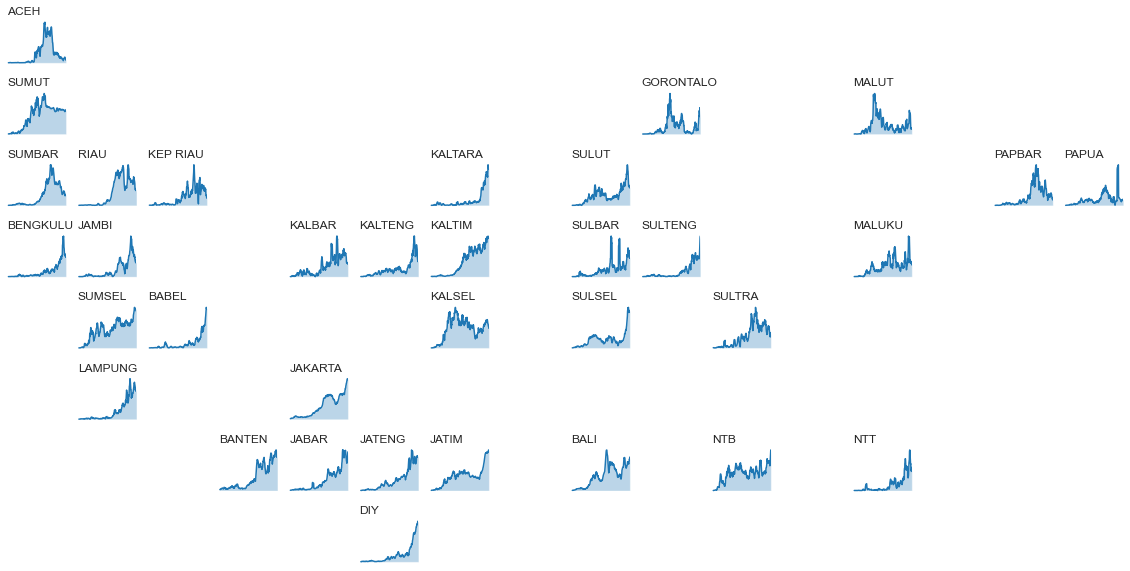

In [295]:
fig, axs = plt.subplots(8,16, figsize=(20,10))

# kasus harian per provinsi

for col in grid_loc.index:
    the_data = kasus_harian.rolling(7).mean().loc[:, col]
    
    y = int(grid_loc.loc[col]['level_0'])
    x = int(grid_loc.loc[col]['level_1'])
    ax = axs[x,y]
    
    
    the_data.plot(ax=ax)
    ax.set_title(col.upper(),x=0,y=1,fontsize=12,loc='left')
    ax.set_xlabel("")
    l1 = ax.lines[0]
    x1 = l1.get_xydata()[:,0]
    y1 = l1.get_xydata()[:,1]
    ax.fill_between(x1,y1,alpha=0.3)
    

for row in axs:
    for ax in row:
        plt.subplots_adjust(hspace=0.6)
        ax.axis('off')

plt.show()

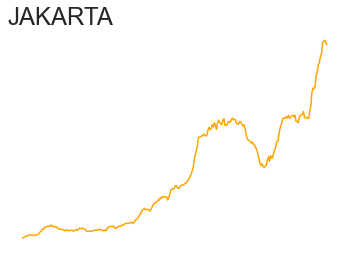

In [309]:
plt.plot(kasus_harian.index,kasus_harian['Jakarta'].rolling(7).mean(), c='orange')
plt.axis('off')
plt.title('Jakarta'.upper(),x=0,y=1,fontsize=24,loc='left')
plt.show()

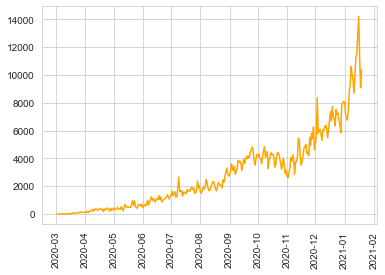

In [144]:
plt.plot(stats.index,stats['Kasus harian'], c='orange')
plt.xticks(rotation=90)
plt.show()